In [1]:
import pandas as pd
import json
import nltk
import re
import string

In [2]:
# Read the JSON data from the file
with open(r'D:\Cignite\valid_defects.json','r') as file:
    data = json.load(file)

# Convert the JSON data into a Pandas DataFrame
df = pd.DataFrame(data)
#df.to_excel(r"D:\Cignite\valid_defects.xlsx",index=False)

In [3]:
df.head()

,Status,Description,Comments,Priority,RootCause,Reporter,IssueKey,Summary,Sprint,Application,Assigne
0,Done,Steps to reproduce:\r\n\r\n1) Launch 'VV App' ...,[{'author': {'accountId': '5b2111db4bcba343d84...,P2 - High,NA,Rohit Singh,MSH-297,Sailor App | QA | Account not getting locked w...,,Sailor App,Former user
1,Done,Steps to reproduce:\r\n\r\n1) Launch 'VV App' ...,[{'author': {'accountId': '5b2111db4bcba343d84...,P2 - High,NA,Rohit Singh,MSH-298,Email not accepting Two Periods in Domain part,PI1.1,Sailor App,Former user
2,Done,Steps to reproduce:\r\n\r\n1) Launch 'VV App' ...,[{'author': {'accountId': '5b2111db4bcba343d84...,P2 - High,NA,Rohit Singh,MSH-296,Email text field accepting Duplicate email add...,PI1.1,Sailor App,Former user
3,Done,"*Known issue, QA team is raising it for tracki...",[{'author': {'accountId': '5b2111db4bcba343d84...,P2 - High,NA,Rohit Singh,MSH-300,"All error states are pointing to ""Age Validati...",PI1.1,Sailor App,Former user
4,Done,"*Known issue, QA team is raising it for tracki...",[{'author': {'accountId': '5b2111db4bcba343d84...,P2 - High,NA,Rohit Singh,MSH-306,Intermediate screen with loader icon not gett...,PI1.1,Sailor App,Former user


In [4]:
with open(r'D:\Cignite\cancelled_defects.json','r') as file:
    data= json.load(file)
df1 = pd.DataFrame(data)
#df1.to_excel(r"D:\Cignite\cancelled_defects.xlsx",index=False)

In [5]:
df.shape

(5427, 11)

In [6]:
df.columns


Index(['Status', 'Description', 'Comments', 'Priority', 'RootCause',
       'Reporter', 'IssueKey', 'Summary', 'Sprint', 'Application', 'Assigne'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5427 entries, 0 to 5426
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Status       5427 non-null   object
 1   Description  5427 non-null   object
 2   Comments     5427 non-null   object
 3   Priority     5427 non-null   object
 4   RootCause    5427 non-null   object
 5   Reporter     5427 non-null   object
 6   IssueKey     5427 non-null   object
 7   Summary      5427 non-null   object
 8   Sprint       5427 non-null   object
 9   Application  5427 non-null   object
 10  Assigne      5427 non-null   object
dtypes: object(11)
memory usage: 466.5+ KB


In [8]:
df['Status'].unique()

array(['Done', 'Backlog', 'Triage', 'CERT Test', 'Prod Test',
       'In Progress', 'Blocked', 'Committed', 'CERT Drop Pending',
       'Reopened', 'PO Review', 'Prod Drop', 'STAGE Test'], dtype=object)

In [9]:
df['Priority'].unique()

array(['P2 - High', 'P3 - Medium', 'P1 - Urgent', 'P4 - Low'],
      dtype=object)

In [10]:
df1['Status'].unique()

array(['Canceled'], dtype=object)

In [11]:
#combining the both valid and cancelled dataframe
combined_data=pd.concat([df,df1],ignore_index=True)

In [12]:
print("Valid_defect Shape",df.shape)
print('Cancelled_defect shape',df1.shape)
print("Combined dataset shape",combined_data.shape)

Valid_defect Shape (5427, 11)
Cancelled_defect shape (2241, 11)
Combined dataset shape (7668, 11)


In [13]:
combined_data.columns

Index(['Status', 'Description', 'Comments', 'Priority', 'RootCause',
       'Reporter', 'IssueKey', 'Summary', 'Sprint', 'Application', 'Assigne'],
      dtype='object')

In [14]:
combined_data['RootCause'].unique()

array(['NA', 'User Error', 'Invalid Issue', 'Code', 'Database', 'Data',
       'Environmental', 'Design', 'Requirements', 'Content', 'Hardware',
       'Product Limitations'], dtype=object)

In [15]:
combined_data['Application'].unique()

array(['Sailor App', 'Crew VXP', 'VV Site', 'CRM', '', 'eCommerce',
       'FirstMates', 'Seaware Main', 'Other', 'Integrations', 'Reporting',
       'NBX', 'MXP', 'Fevo', 'Odysseus'], dtype=object)

In [16]:
# create a class lable valid or invalid respectively
combined_data['Class']=combined_data['Status'].apply(lambda x:'Invalid' if x=='Canceled' else 'Valid')

In [17]:
combined_data.tail()


,Status,Description,Comments,Priority,RootCause,Reporter,IssueKey,Summary,Sprint,Application,Assigne,Class
7663,Canceled,CERT | Sailor App | On Cruise | Homepage | Con...,[{'author': {'accountId': '5a941a590a5797447b7...,P1 - Urgent,Content,Rohit Singh,MSH-43775,CERT | Sailor App | On Cruise | Homepage | Con...,,Sailor App,Rohit Singh,Invalid
7664,Canceled,"""'No deck assigned to you' is displaying for t...",[{'author': {'accountId': '5dcaf8ee60719b0dfa3...,P1 - Urgent,User Error,kishan.kumar,MSH-43872,CrewVXP | PROD | Housekeeping | 'No deck assig...,PI7.6,Crew VXP,kishan.kumar,Invalid
7665,Canceled,Description: Chat resolved time is not display...,[{'author': {'accountId': '5d4b488a43be520cf63...,P3 - Medium,NA,Anusha Satrasala,MSH-43903,Crew VXP | CERT | Support Queue | Chat resolve...,,Crew VXP,Anusha Satrasala,Invalid
7666,Canceled,test,[],P3 - Medium,NA,Exalate,MSH-43969,test exalate,,Other,Vishesh Teng,Invalid
7667,Canceled,We are unable to perform voyage-rollover on VV...,[{'author': {'accountId': '557058:c020323a-70e...,P2 - High,NA,Exalate,MSH-43976,VV Cert | 2020-07-19/2020-07-24 voyage data is...,,Other,Himanshu Kumawat,Invalid


### we need to check the class count to see if the class label are update
 
    ---In Combined dataset,5427 datapoints shouldhave valid classes and 2241 datapoints should have invalid class

     Valid_defect Shape (5427, 11)
     Cancelled_defect shape (2241, 11)


In [18]:
combined_data['Class'].value_counts()  # We can see ,classes are updated correctly

Valid      5427
Invalid    2241
Name: Class, dtype: int64

### Lets do the TextPreprocessing Steps
     1.Cleaning Text 
     2.removing stopwords
     3.Text Lemmatization
     4.WordCloud
     5.Converting into Vectors using TF_IDF


In [19]:
def clean(text): 
  

    # Special characters
    
    text=re.sub(r'^\d+$', "", text)
    text=re.sub(r'\d+', '',text)
    
    
    # Contractions
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"there's", "there is", text)
    text = re.sub(r"We're", "We are", text)
    text = re.sub(r"That's", "That is", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"they're", "they are", text)
    text = re.sub(r"Can't", "Cannot", text)
    text = re.sub(r"wasn't", "was not", text)
    text = re.sub(r"don\x89Ûªt", "do not", text)
    text = re.sub(r"aren't", "are not", text)
    text = re.sub(r"isn't", "is not", text)
    text = re.sub(r"What's", "What is", text)
    text = re.sub(r"haven't", "have not", text)
    text = re.sub(r"hasn't", "has not", text)
    text = re.sub(r"There's", "There is", text)
    text = re.sub(r"He's", "He is", text)
    text = re.sub(r"It's", "It is", text)
    text = re.sub(r"You're", "You are", text)
    text = re.sub(r"I'M", "I am", text)
    text = re.sub(r"shouldn't", "should not", text)
    text = re.sub(r"wouldn't", "would not", text)
    text = re.sub(r"i'm", "I am", text)
    text = re.sub(r"I\x89Ûªm", "I am", text)
    text = re.sub(r"I'm", "I am", text)
    text = re.sub(r"Isn't", "is not", text)
    text = re.sub(r"Here's", "Here is", text)
    text = re.sub(r"you've", "you have", text)
    text = re.sub(r"you\x89Ûªve", "you have", text)
    text = re.sub(r"we're", "we are", text)
    text = re.sub(r"what's", "what is", text)
    text = re.sub(r"couldn't", "could not", text)
    text = re.sub(r"we've", "we have", text)
    text = re.sub(r"it\x89Ûªs", "it is", text)
    text = re.sub(r"doesn\x89Ûªt", "does not", text)
    text = re.sub(r"It\x89Ûªs", "It is", text)
    text = re.sub(r"Here\x89Ûªs", "Here is", text)
    text = re.sub(r"who's", "who is", text)
    text = re.sub(r"I\x89Ûªve", "I have", text)
    text = re.sub(r"y'all", "you all", text)
    text = re.sub(r"can\x89Ûªt", "cannot", text)
    text = re.sub(r"would've", "would have", text)
    text = re.sub(r"it'll", "it will", text)
    text = re.sub(r"we'll", "we will", text)
    text = re.sub(r"wouldn\x89Ûªt", "would not", text)
    text = re.sub(r"We've", "We have", text)
    text = re.sub(r"he'll", "he will", text)
    text = re.sub(r"Y'all", "You all", text)
    text = re.sub(r"Weren't", "Were not", text)
    text = re.sub(r"Didn't", "Did not", text)
    text = re.sub(r"they'll", "they will", text)
    text = re.sub(r"they'd", "they would", text)
    text = re.sub(r"DON'T", "DO NOT", text)
    text = re.sub(r"That\x89Ûªs", "That is", text)
    text = re.sub(r"they've", "they have", text)
    text = re.sub(r"i'd", "I would", text)
    text = re.sub(r"should've", "should have", text)
    text = re.sub(r"You\x89Ûªre", "You are", text)
    text = re.sub(r"where's", "where is", text)
    text = re.sub(r"Don\x89Ûªt", "Do not", text)
    text = re.sub(r"we'd", "we would", text)
    text = re.sub(r"i'll", "I will", text)
    text = re.sub(r"weren't", "were not", text)
    text = re.sub(r"They're", "They are", text)
    text = re.sub(r"Can\x89Ûªt", "Cannot", text)
    text = re.sub(r"you\x89Ûªll", "you will", text)
    text = re.sub(r"I\x89Ûªd", "I would", text)
    text = re.sub(r"let's", "let us", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"can't", "cannot", text)
    text = re.sub(r"don't", "do not", text)
    text = re.sub(r"you're", "you are", text)
    text = re.sub(r"i've", "I have", text)
    text = re.sub(r"that's", "that is", text)
    text = re.sub(r"i'll", "I will", text)
    text = re.sub(r"doesn't", "does not", text)
    text = re.sub(r"i'd", "I would", text)
    text = re.sub(r"didn't", "did not", text)
    text = re.sub(r"ain't", "am not", text)
    text = re.sub(r"you'll", "you will", text)
    text = re.sub(r"I've", "I have", text)
    text = re.sub(r"Don't", "do not", text)
    text = re.sub(r"I'll", "I will", text)
    text = re.sub(r"I'd", "I would", text)
    text = re.sub(r"Let's", "Let us", text)
    text = re.sub(r"you'd", "You would", text)
    text = re.sub(r"It's", "It is", text)
    text = re.sub(r"Ain't", "am not", text)
    text = re.sub(r"Haven't", "Have not", text)
    text = re.sub(r"Could've", "Could have", text)
    text = re.sub(r"youve", "you have", text)  
    text = re.sub(r"donå«t", "do not", text)   
    # usernames mentions like "@abc123"        
    ment = re.compile(r"(@[A-Za-z0-9]+)")
    text =  ment.sub(r'', text)
    # Character entity references
    text = re.sub(r"&amp;", "&", text)
    text =re.sub(r'^\d+$','',text)
    # html tags
    html = re.compile(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    text = re.sub(html, '', text)
    
    # Urls
    text = re.sub(r"https?:\/\/t.co\/[A-Za-z0-9]+", "", text)
    text = re.sub(r'https?://\S+|www\.\S+','', text)
        
    #Punctuations and special characters
    
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
    
    text = text.lower()
    
    splits = text.split()
    splits = [word for word in splits if word not in set(nltk.corpus.stopwords.words('english'))]
    text = ' '.join(splits)
    
    
    return text


In [20]:
combined_data['Description']=combined_data['Description'].apply(clean)

In [21]:
combined_data['Summary']=combined_data['Summary'].apply(clean)

In [22]:
combined_data.head()

,Status,Description,Comments,Priority,RootCause,Reporter,IssueKey,Summary,Sprint,Application,Assigne,Class
0,Done,steps reproduce launch vv app iphoneandroid de...,[{'author': {'accountId': '5b2111db4bcba343d84...,P2 - High,NA,Rohit Singh,MSH-297,sailor app qa account getting locked login inc...,,Sailor App,Former user,Valid
1,Done,steps reproduce launch vv app iphoneandroid de...,[{'author': {'accountId': '5b2111db4bcba343d84...,P2 - High,NA,Rohit Singh,MSH-298,email accepting two periods domain part,PI1.1,Sailor App,Former user,Valid
2,Done,steps reproduce launch vv app iphoneandroid de...,[{'author': {'accountId': '5b2111db4bcba343d84...,P2 - High,NA,Rohit Singh,MSH-296,email text field accepting duplicate email add...,PI1.1,Sailor App,Former user,Valid
3,Done,known issue qa team raising tracking purpose s...,[{'author': {'accountId': '5b2111db4bcba343d84...,P2 - High,NA,Rohit Singh,MSH-300,error states pointing age validation error pag...,PI1.1,Sailor App,Former user,Valid
4,Done,known issue qa team raising tracking purpose s...,[{'author': {'accountId': '5b2111db4bcba343d84...,P2 - High,NA,Rohit Singh,MSH-306,intermediate screen loader icon getting displa...,PI1.1,Sailor App,Former user,Valid


In [23]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
def remove_stopword(x):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(x)  # Tokenize the description into words
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return " ".join(filtered_words)  

In [24]:
combined_data['Description']=combined_data['Description'].apply(remove_stopword)


In [25]:
combined_data['Summary']=combined_data['Summary'].apply(remove_stopword)


In [26]:
combined_data.head()

,Status,Description,Comments,Priority,RootCause,Reporter,IssueKey,Summary,Sprint,Application,Assigne,Class
0,Done,steps reproduce launch vv app iphoneandroid de...,[{'author': {'accountId': '5b2111db4bcba343d84...,P2 - High,NA,Rohit Singh,MSH-297,sailor app qa account getting locked login inc...,,Sailor App,Former user,Valid
1,Done,steps reproduce launch vv app iphoneandroid de...,[{'author': {'accountId': '5b2111db4bcba343d84...,P2 - High,NA,Rohit Singh,MSH-298,email accepting two periods domain part,PI1.1,Sailor App,Former user,Valid
2,Done,steps reproduce launch vv app iphoneandroid de...,[{'author': {'accountId': '5b2111db4bcba343d84...,P2 - High,NA,Rohit Singh,MSH-296,email text field accepting duplicate email add...,PI1.1,Sailor App,Former user,Valid
3,Done,known issue qa team raising tracking purpose s...,[{'author': {'accountId': '5b2111db4bcba343d84...,P2 - High,NA,Rohit Singh,MSH-300,error states pointing age validation error pag...,PI1.1,Sailor App,Former user,Valid
4,Done,known issue qa team raising tracking purpose s...,[{'author': {'accountId': '5b2111db4bcba343d84...,P2 - High,NA,Rohit Singh,MSH-306,intermediate screen loader icon getting displa...,PI1.1,Sailor App,Former user,Valid


In [27]:
from nltk.stem import WordNetLemmatizer
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    words = word_tokenize(text)  # Tokenize the text into words
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    lemmatized_text = ' '.join(lemmatized_words)
    return lemmatized_text

In [28]:
combined_data['Description']=combined_data['Description'].apply(lemmatize_text)
#combined_data['Summary']=combined_data['Summary'].apply(lambda x: [wnl.lemmatize(word)for word in x])


In [29]:
combined_data['Summary']=combined_data['Summary'].apply(lemmatize_text)

In [30]:
combined_data.head()

,Status,Description,Comments,Priority,RootCause,Reporter,IssueKey,Summary,Sprint,Application,Assigne,Class
0,Done,step reproduce launch vv app iphoneandroid dev...,[{'author': {'accountId': '5b2111db4bcba343d84...,P2 - High,NA,Rohit Singh,MSH-297,sailor app qa account getting locked login inc...,,Sailor App,Former user,Valid
1,Done,step reproduce launch vv app iphoneandroid dev...,[{'author': {'accountId': '5b2111db4bcba343d84...,P2 - High,NA,Rohit Singh,MSH-298,email accepting two period domain part,PI1.1,Sailor App,Former user,Valid
2,Done,step reproduce launch vv app iphoneandroid dev...,[{'author': {'accountId': '5b2111db4bcba343d84...,P2 - High,NA,Rohit Singh,MSH-296,email text field accepting duplicate email add...,PI1.1,Sailor App,Former user,Valid
3,Done,known issue qa team raising tracking purpose s...,[{'author': {'accountId': '5b2111db4bcba343d84...,P2 - High,NA,Rohit Singh,MSH-300,error state pointing age validation error page...,PI1.1,Sailor App,Former user,Valid
4,Done,known issue qa team raising tracking purpose s...,[{'author': {'accountId': '5b2111db4bcba343d84...,P2 - High,NA,Rohit Singh,MSH-306,intermediate screen loader icon getting displa...,PI1.1,Sailor App,Former user,Valid


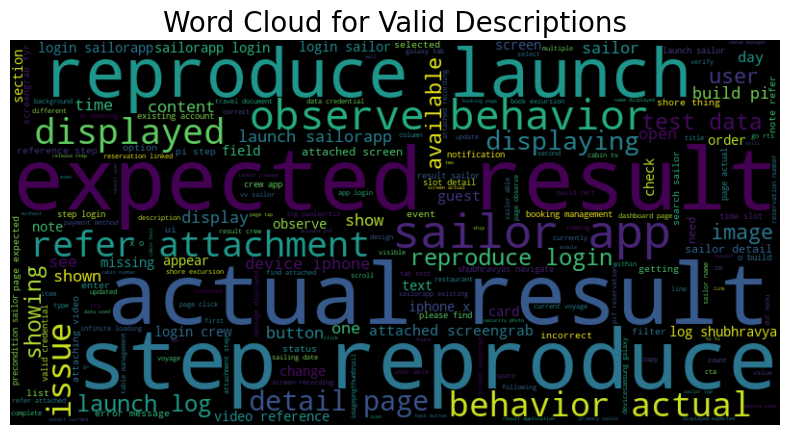

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Assuming 'df' is your DataFrame
filtered_df = combined_data[combined_data['Class'] == 'Valid']

# Concatenate the 'description' column into a single string
combined_text = ' '.join(filtered_df['Description'])
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(combined_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Valid Descriptions', fontsize=20) 
plt.show()
plt.show()


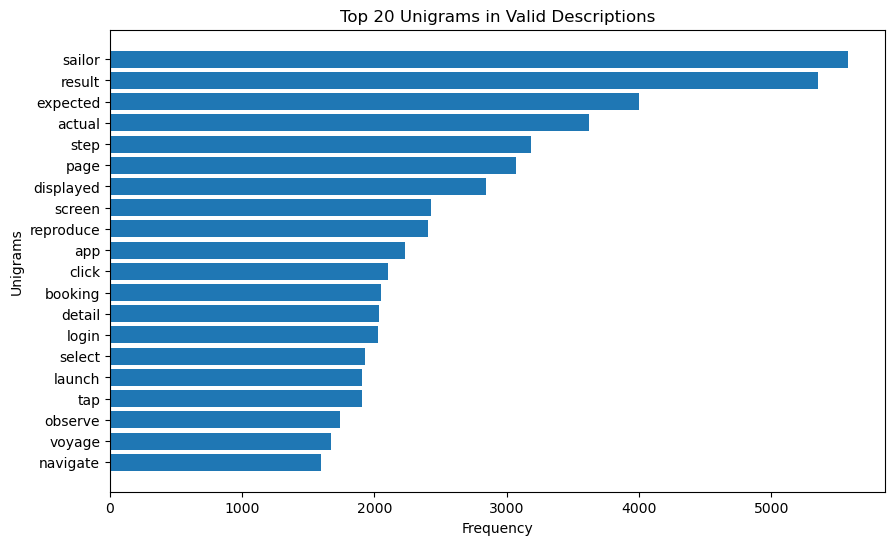

In [34]:
from collections import Counter
combined_text = ' '.join(filtered_df['Description'])
words = word_tokenize(combined_text)

word_freq = Counter(words)
top_20_unigrams = word_freq.most_common(20)
top_words, top_freqs = zip(*top_20_unigrams)

# Create a bar plot for the top 20 unigrams
plt.figure(figsize=(10, 6))
plt.barh(top_words, top_freqs)
plt.xlabel('Frequency')
plt.ylabel('Unigrams')
plt.title('Top 20 Unigrams in Valid Descriptions')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most frequent at the top
plt.show()


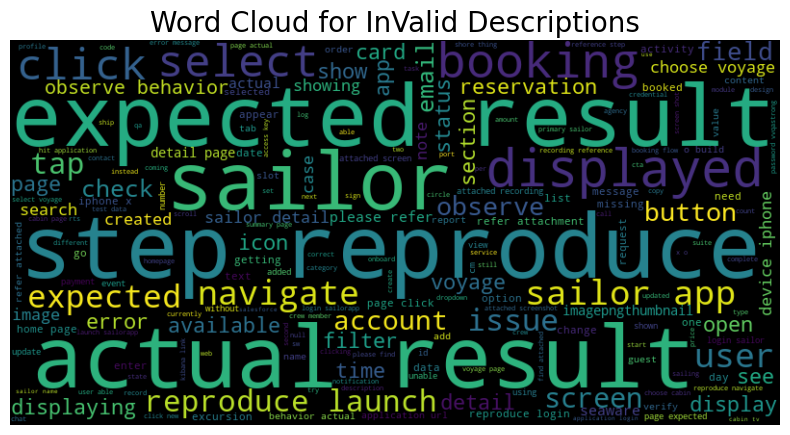

In [35]:
filtered_df1 = combined_data[combined_data['Class'] == 'Invalid']

# Concatenate the 'description' column into a single string
combined_text = ' '.join(filtered_df1['Description'])
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(combined_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for InValid Descriptions', fontsize=20)  
plt.show()
plt.show()

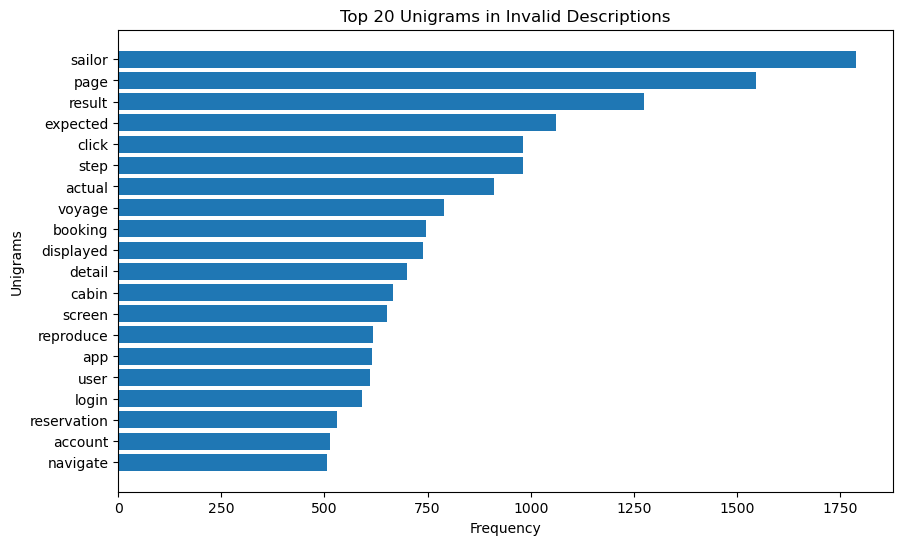

In [36]:
combined_text = ' '.join(filtered_df1['Description'])
words = word_tokenize(combined_text)
word_freq = Counter(words)
top_20_unigrams = word_freq.most_common(20)
top_words, top_freqs = zip(*top_20_unigrams)
plt.figure(figsize=(10, 6))
plt.barh(top_words, top_freqs)
plt.xlabel('Frequency')
plt.ylabel('Unigrams')
plt.title('Top 20 Unigrams in Invalid Descriptions')
plt.gca().invert_yaxis()
plt.show()


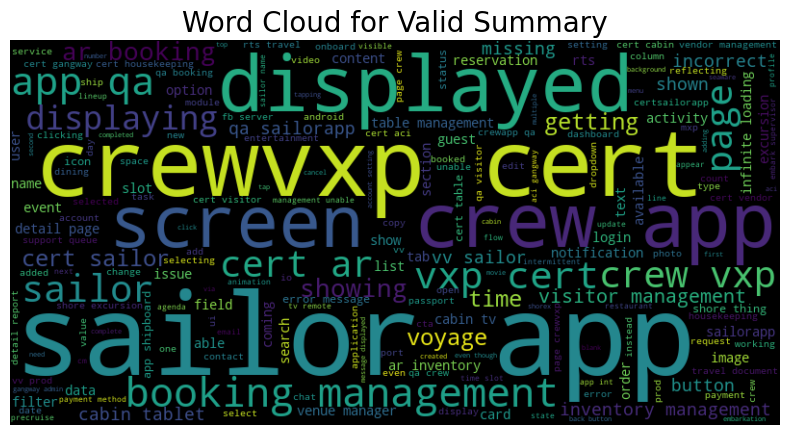

In [37]:
filtered_df3 = combined_data[combined_data['Class'] == 'Valid']

# Concatenate the 'description' column into a single string
combined_text = ' '.join(filtered_df3['Summary'])
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(combined_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Valid Summary', fontsize=20)  
plt.show()
plt.show()

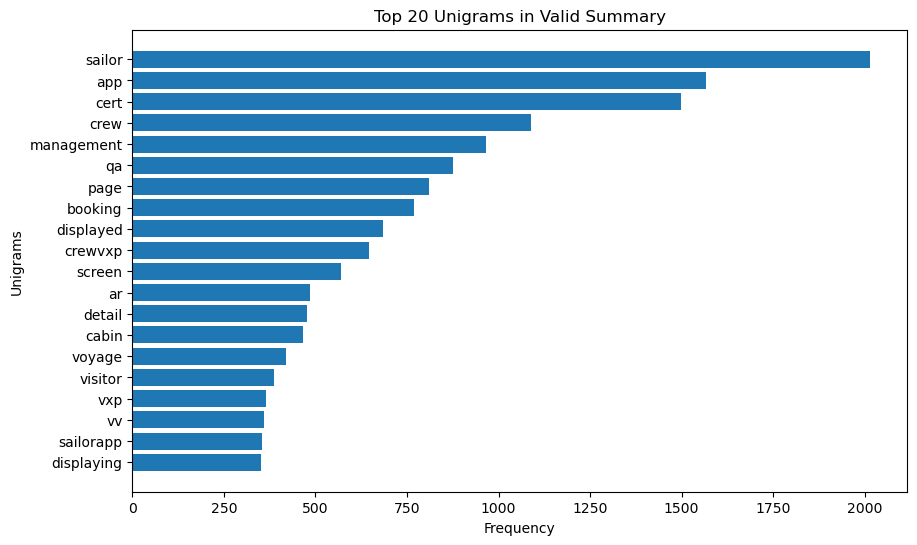

In [38]:
combined_text = ' '.join(filtered_df3['Summary'])
words = word_tokenize(combined_text)

word_freq = Counter(words)
top_20_unigrams = word_freq.most_common(20)
top_words, top_freqs = zip(*top_20_unigrams)

# Create a bar plot for the top 20 unigrams
plt.figure(figsize=(10, 6))
plt.barh(top_words, top_freqs)
plt.xlabel('Frequency')
plt.ylabel('Unigrams')
plt.title('Top 20 Unigrams in Valid Summary')
plt.gca().invert_yaxis() 
plt.show()


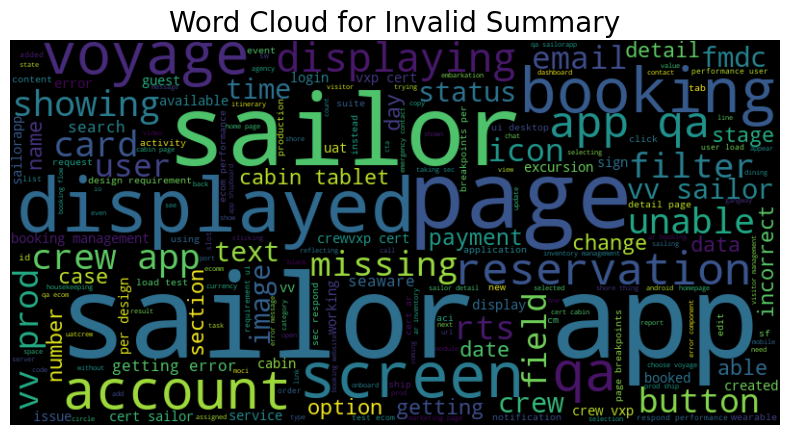

In [39]:
filtered_df4 = combined_data[combined_data['Class'] == 'Invalid']

# Concatenate the 'description' column into a single string
combined_text = ' '.join(filtered_df4['Summary'])
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(combined_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Invalid Summary', fontsize=20)
plt.show()
plt.show()

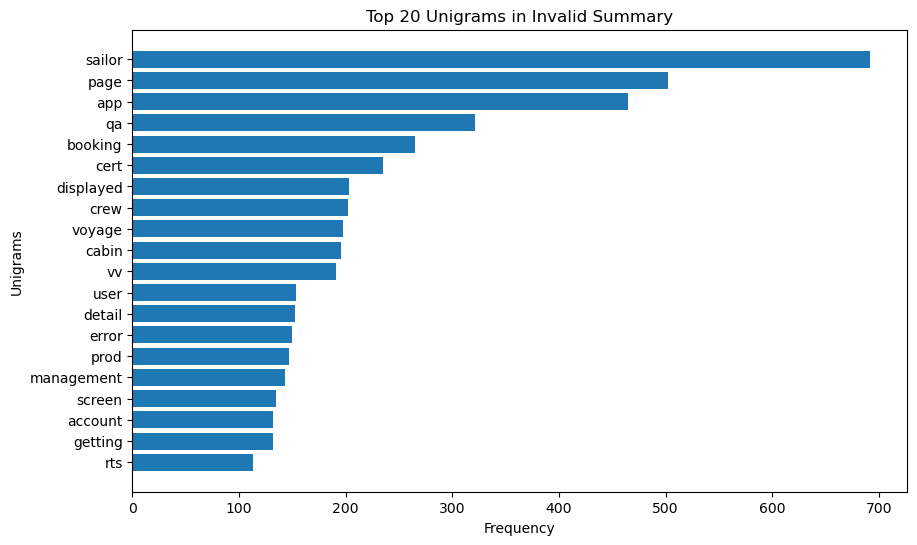

In [40]:
combined_text = ' '.join(filtered_df4['Summary'])
words = word_tokenize(combined_text)

word_freq = Counter(words)
top_20_unigrams = word_freq.most_common(20)
top_words, top_freqs = zip(*top_20_unigrams)

plt.figure(figsize=(10, 6))
plt.barh(top_words, top_freqs)
plt.xlabel('Frequency')
plt.ylabel('Unigrams')
plt.title('Top 20 Unigrams in Invalid Summary')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most frequent at the top
plt.show()


In [41]:
# combining the description and summary into single field

combined_data['text'] = combined_data['Description'] + ' ' + combined_data['Summary']

In [42]:
# conveting class labels into 0 and 1
combined_data['Class'] = combined_data['Class'].map({'Invalid': 0, 'Valid': 1})

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [44]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(combined_data['text'])

In [45]:
X_train,X_test,y_train,y_test = train_test_split(tfidf_matrix,combined_data['Class'],test_size=0.2,random_state=42)

In [46]:
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)


Accuracy: 0.80
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.36      0.50       436
           1       0.79      0.97      0.87      1098

    accuracy                           0.80      1534
   macro avg       0.81      0.66      0.69      1534
weighted avg       0.80      0.80      0.77      1534



In [47]:
#Saving the model
import pickle
with open('D:\Cignite\lg_model.pkl', 'wb') as model_file:
    pickle.dump(classifier, model_file)


In [48]:
with open(r'D:\Cignite\tfidf_vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(tfidf_vectorizer, vectorizer_file)
    

## XGBOOST Classifier

In [49]:
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train)
xgby_pred = xgb_classifier.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, xgby_pred)
report = classification_report(y_test, xgby_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 0.79
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.38      0.50       436
           1       0.79      0.95      0.86      1098

    accuracy                           0.79      1534
   macro avg       0.77      0.66      0.68      1534
weighted avg       0.78      0.79      0.76      1534



In [50]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Assuming 'input_description' contains the defect description you want to classify
input_description = ["Middle name from the Sailor account is not being moved from SFDC to SW, when trying to create a reservation"]
input_description = [' '.join(input_description)] 
input_tfidf = tfidf_vectorizer.transform(input_description)
classification = classifier.predict(input_tfidf)[0]
#classification = classifier.predict([input_description])[0]

if classification == 0:
    invalid_defects = df1.copy()  
    
      # Fit and transform the text data
    tfidf_matrix_invalid_defects = tfidf_vectorizer.fit_transform(invalid_defects['Description'])
    with open(r'D:\Cignite\tfidf_matrix_invalid_defects.pkl', 'wb') as vectorizer_file:
         pickle.dump(tfidf_matrix_invalid_defects, vectorizer_file)

    # Calculate cosine similarity between the input defect and all 'invalid' defects
    cosine_similarities = linear_kernel(input_tfidf,tfidf_matrix_invalid_defects).flatten()

    # Get indices of similar defects
    similar_indices = cosine_similarities.argsort()[::-1]

    # Extract recommended reasons (defect descriptions) from similar defects
    recommended_reasons = invalid_defects.iloc[similar_indices[:10]]['Description'].tolist()

    # Print or display the recommended reasons
    print("Top Reasons for 'Invalid' Defects:")
    for i, reason in enumerate(recommended_reasons, start=1):
        print(f"Defect Reason {i}: {reason}")
else:
    print("The defect is classified as 'Valid.'")

Top Reasons for 'Invalid' Defects:
Defect Reason 1: Steps to Reproduce:
1. Open url :[https://qa.virginvoyages.com/book|https://qa.virginvoyages.com/book]
2. Create an account and complete the booking with New-Zealand IP or AUD
3. Select to pay any amount and use the existing card on file to make the payment. 
4. Payment is not going thru. It went thru after few attempts. This is an intermittent issue.
Defect Reason 2: uat.virginvoyages.com
user:spreston284@gmail.com pass:testingvirgin
In the Payment screen I entered a billing address for Haiti, and selected box to make Mailing address the same. I was able to complete the booking. When verifying in Seaware touch and Salesforce, No mailing address was reflecting for that booking. Check booking number 88508. 
NOTE: The screenshot reflects a special character, please ignore, in order to move on and create booking i removed special character,
Defect Reason 3: Steps to Reproduce:
1.  Navigate to ecomweb and create an account.
2.  Make a res